<a href="https://colab.research.google.com/github/GauranshPawar7/Heart-Disease-Prediction-App/blob/main/HeartProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/heart.csv')

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# **EDA**

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

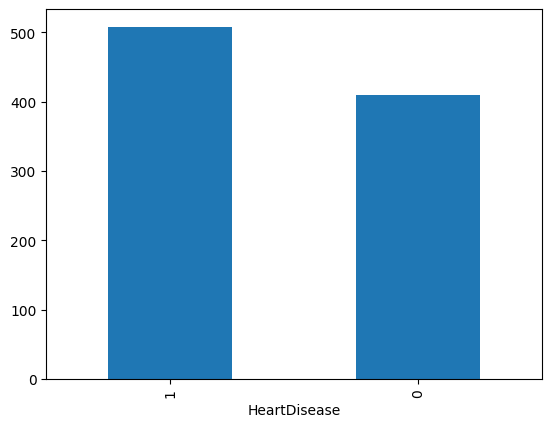

In [9]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [10]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


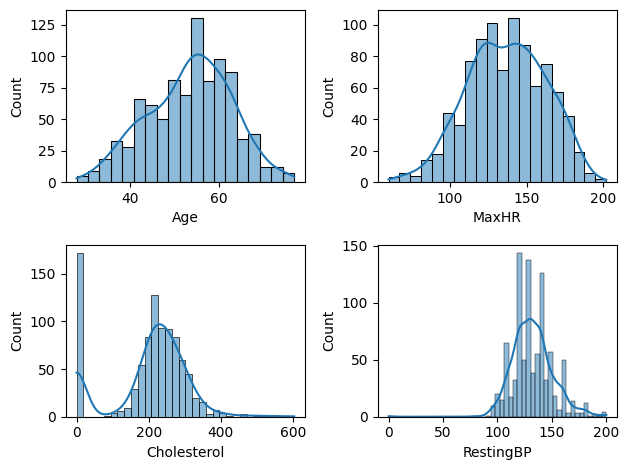

In [11]:
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)


plotting('Age',1)
plotting('MaxHR',2)
plotting('Cholesterol',3)
plotting('RestingBP',4)

plt.tight_layout()

In [12]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [13]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()    #Missing/invalid values (0) ko replace karne ke liye ek meaningful value (mean) nikalna.
df['Cholesterol'] = df['Cholesterol'].round(2)                   #Data ko clean aur uniform banana (decimal places ek jaise rakhna).
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)         #0 (missing/invalid) values ko average value se fill karke dataset ko complete banana.


In [14]:
Rp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()     # Missing/invalid values (0) ko replace karne ke liye ek meaningful value (mean) nikalna.
df['RestingBP'] = df['RestingBP'].replace(0, Rp_mean)          # 0 (missing/invalid) values ko average value se fill karke dataset ko complete banana.
df['RestingBP'] = df['RestingBP'].round(2)                     # Data ko clean aur uniform banana (decimal places ek jaise rakhna).


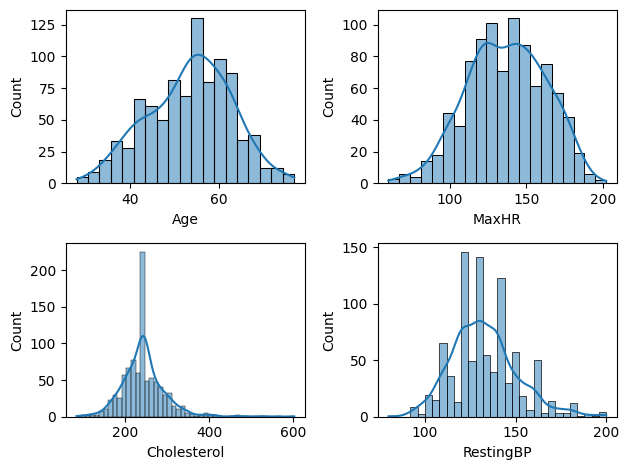

In [15]:
# isme hamne resting BP or Cholestrol ko dekha toh aab joh zero peh value thi voh remove ho gyi data ke zero value mean se bhar gyi

def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)


plotting('Age',1)
plotting('MaxHR',2)
plotting('Cholesterol',3)
plotting('RestingBP',4)

plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

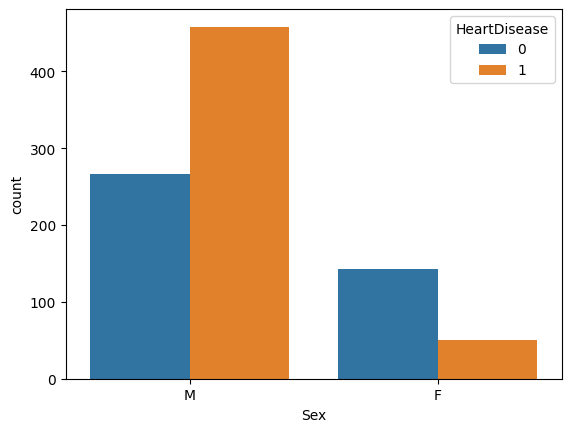

In [16]:
sns.countplot(x='Sex',hue='HeartDisease',data=df)

<Axes: xlabel='ChestPainType', ylabel='count'>

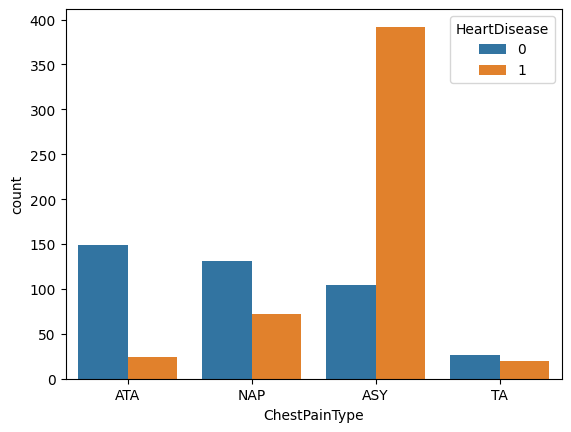

In [17]:
sns.countplot(x='ChestPainType',hue='HeartDisease',data=df)

<Axes: xlabel='FastingBS', ylabel='count'>

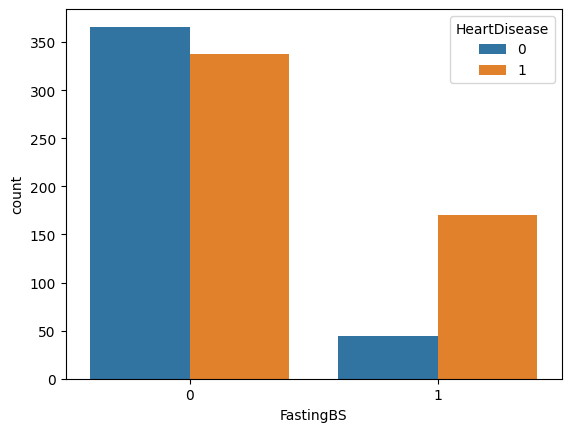

In [18]:
sns.countplot(x='FastingBS',hue='HeartDisease',data=df)

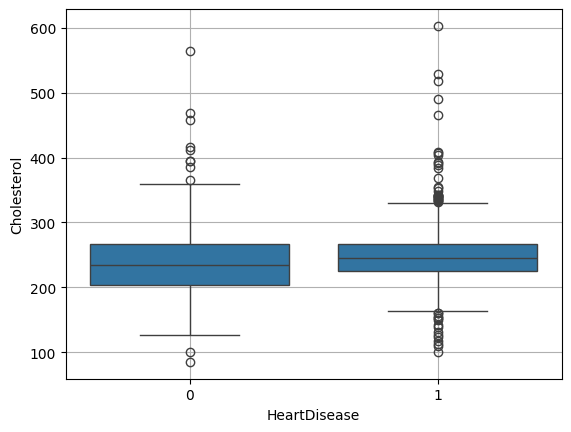

In [19]:
sns.boxplot(x='HeartDisease',y='Cholesterol',data=df)
plt.grid(True)

<Axes: xlabel='HeartDisease', ylabel='Age'>

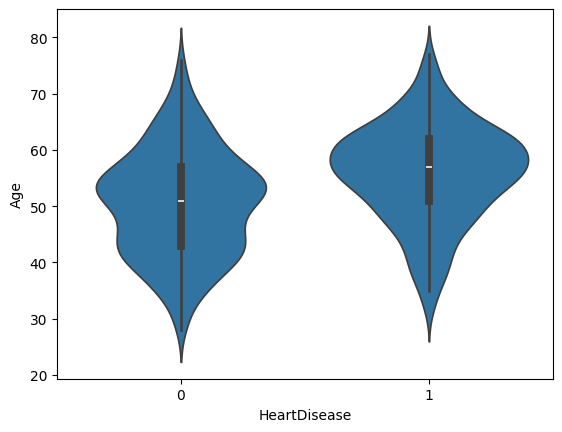

In [20]:
sns.violinplot(x='HeartDisease',y='Age',data=df)


<Axes: >

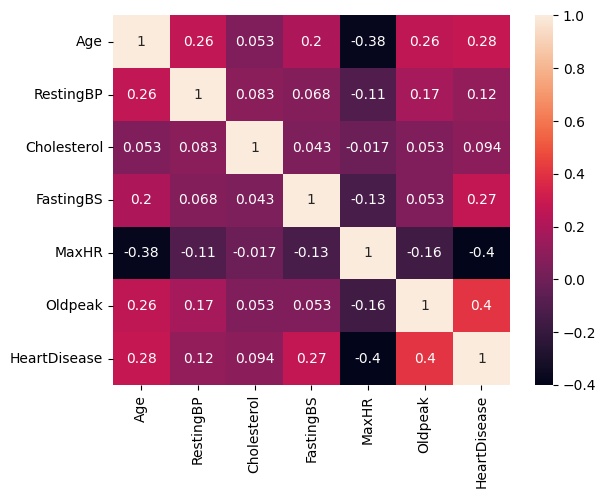

In [21]:
sns.heatmap(df.corr(numeric_only= True),annot=True)

# **Data Preprocessing and Cleaning**

In [22]:
df_encode = pd.get_dummies(df,drop_first=True)

In [23]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [24]:
df_encode = df_encode.astype(int)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [25]:

# 1️⃣ Import StandardScaler from sklearn.preprocessing – it helps to scale numeric data.
# 2️⃣ Create a scaler object: scaler = StandardScaler()
# 3️⃣ Define which columns are numerical (Age, RestingBP, Cholesterol, MaxHR, Oldpeak)
# 4️⃣ Apply scaler.fit_transform() on these columns:
#       - fit() calculates mean & standard deviation of each column
#       - transform() converts each value to (value - mean) / std
# 5️⃣ This process standardizes data so all numeric features are on the same scale:
#       - mean = 0, standard deviation = 1
# 6️⃣ Helps machine learning models perform better by avoiding scale imbalance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
munerical_col= ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
df_encode[munerical_col] = scaler.fit_transform(df_encode[munerical_col])
df_encode.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1
5,-1.539213,-0.697453,1.773024,0,1.304332,-0.727592,0,1,0,1,0,1,0,0,0,1
6,-0.902775,-0.141284,-0.141047,0,1.304332,-0.727592,0,0,1,0,0,1,0,0,0,1
7,0.051881,-1.253622,-0.685244,0,0.203982,-0.727592,0,1,1,0,0,1,0,0,0,1
8,-1.751359,0.414885,-0.704009,0,-0.267596,0.282891,1,1,0,0,0,1,0,1,1,0
9,-0.584556,-0.697453,0.740927,0,-0.660578,-0.727592,0,0,1,0,0,1,0,0,0,1


In [26]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [27]:
x = df_encode.drop('HeartDisease',axis =1)
y = df_encode['HeartDisease']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [30]:
models  = {
    "Logistic Regression" : LogisticRegression(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Support Vector Machine" : SVC(probability=True),
    "K-Nearest Neighbors" : KNeighborsClassifier()
}

In [31]:
result= []

In [32]:
for name,model in models.items():
  model.fit(X_train_sc,y_train)
  y_pred = model.predict(X_test_sc)
  accuracy = accuracy_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  result.append({
      'Model' : name,
      'Accuracy' : round(accuracy,4),
      'F1 Score' : round(f1,4)
 })


In [33]:
result

[{'Model': 'Logistic Regression', 'Accuracy': 0.8696, 'F1 Score': 0.8846},
 {'Model': 'Naive Bayes', 'Accuracy': 0.8478, 'F1 Score': 0.8614},
 {'Model': 'Decision Tree', 'Accuracy': 0.788, 'F1 Score': 0.8079},
 {'Model': 'Support Vector Machine', 'Accuracy': 0.8478, 'F1 Score': 0.8667},
 {'Model': 'K-Nearest Neighbors', 'Accuracy': 0.8641, 'F1 Score': 0.8815}]

In [34]:
import joblib
joblib.dump(models['Logistic Regression'],'LR_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(x.columns.tolist(),'columns.pkl')

['columns.pkl']